<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2024-03-11 12:51:03--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2024-03-11 12:51:03--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2024-03-11 12:51:03 (11.3 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2024-03-11 12:51:03--
Total wall clock time: 0.3s
Downloaded: 1 files, 418K in 0.04s (11.3 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
# Cargar el dataset
df = pd.read_csv('weight_height.csv')

# Verificar si hay elementos faltantes en el dataset
df_faltantes = df.isnull().sum()

df_faltantes


df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_sin_faltantes = df.dropna()
df_sin_faltantes

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

df2 = df.copy()

# Transformar la columna de peso de libras a kilogramos
df2['peso'] = df['Weight'] * 0.453592

# Transformar la columna de altura de pulgadas a metros
df2['altura'] = df['Height'] / 39.3701

df2['sexo'] = df['Gender'].replace({'Male': 'masculino', 'Female': 'femenino'})


# Eliminar las columnas originales si ya no son necesarias
df2 = df2.drop(columns=['Weight', 'Height', 'Gender'])

df2


,peso,altura,sexo
0,109.720985,1.875713,masculino
1,73.622732,1.747059,masculino
2,96.497550,1.882396,masculino
3,99.809504,1.821966,masculino
4,93.598619,1.774997,masculino
...,...,...,...
9995,62.041159,1.680784,femenino
9996,77.504315,1.703505,femenino
9997,58.275377,1.622246,femenino
9998,74.322166,1.753469,femenino


In [17]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

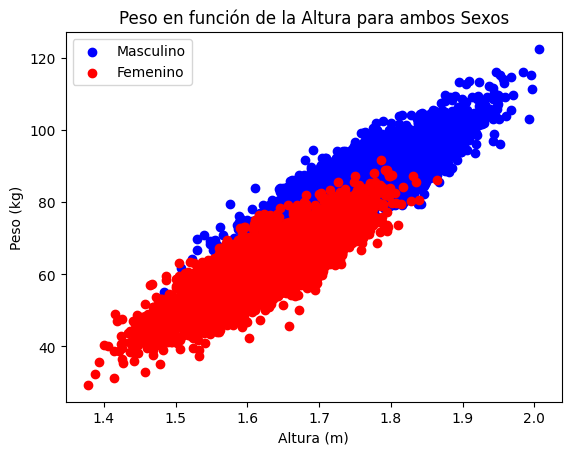

In [18]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
# Crear una figura y un eje
fig, ax = plt.subplots()

# Filtrar y graficar el peso en función de la altura para el sexo masculino
df_masculino = df2[df2['sexo'] == 'masculino']
ax.scatter(df_masculino['altura'], df_masculino['peso'], color='blue', label='Masculino')

# Filtrar y graficar el peso en función de la altura para el sexo femenino
df_femenino = df2[df2['sexo'] == 'femenino']
ax.scatter(df_femenino['altura'], df_femenino['peso'], color='red', label='Femenino')

# Añadir leyenda y etiquetas a los ejes
ax.legend()
ax.set_xlabel('Altura (m)')
ax.set_ylabel('Peso (kg)')
ax.set_title('Peso en función de la Altura para ambos Sexos')

# Mostrar la gráfica
plt.show()


In [ ]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

El valor medio de la altura para los hombres es: 1.75 metros


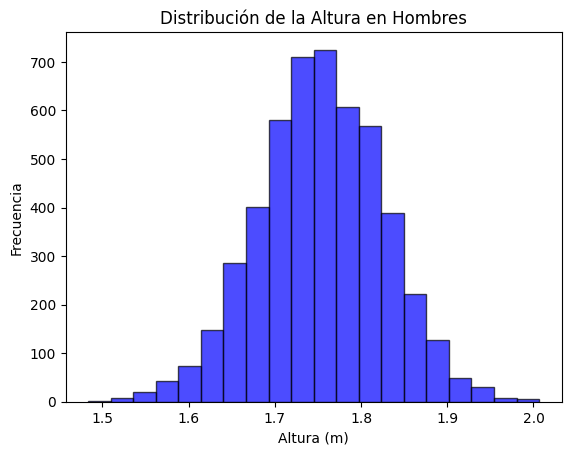

In [20]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
df_hombres = df2[df2['sexo'] == 'masculino']
valor_medio_altura_hombres = df_hombres['altura'].mean()
print(f"El valor medio de la altura para los hombres es: {valor_medio_altura_hombres:.2f} metros")
plt.hist(df_hombres['altura'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Altura en Hombres')
plt.show()




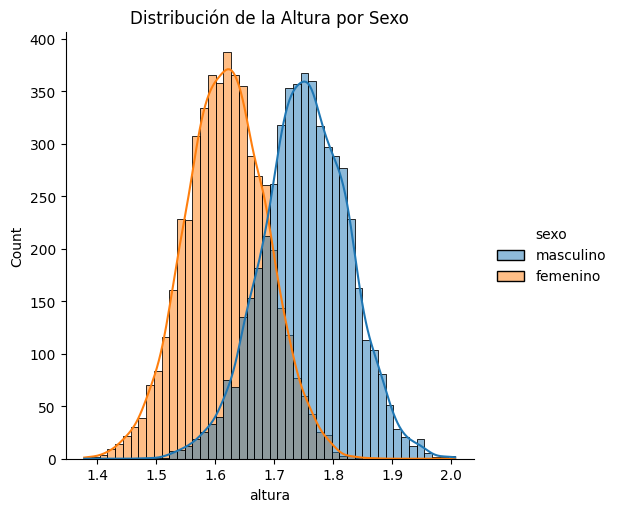

In [21]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo", kde=True)
plt.title('Distribución de la Altura por Sexo')
plt.show()


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

R2 Score para hombres: 0.75
R2 Score para mujeres: 0.73


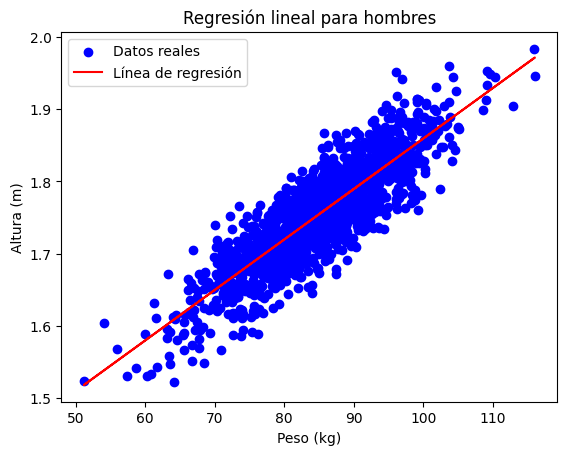

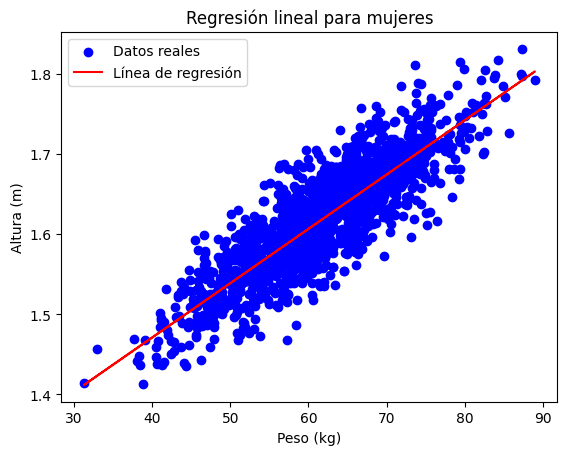

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Para hombres
X_hombres = df2[df2['sexo'] == 'masculino']['peso'].values.reshape(-1, 1)
y_hombres = df2[df2['sexo'] == 'masculino']['altura'].values

# Para mujeres
X_mujeres = df2[df2['sexo'] == 'femenino']['peso'].values.reshape(-1, 1)
y_mujeres = df2[df2['sexo'] == 'femenino']['altura'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_hombres, X_test_hombres, y_train_hombres, y_test_hombres = train_test_split(X_hombres, y_hombres, test_size=0.3, random_state=42)
X_train_mujeres, X_test_mujeres, y_train_mujeres, y_test_mujeres = train_test_split(X_mujeres, y_mujeres, test_size=0.3, random_state=42)

# Entrenar el modelo para hombres
modelo_hombres = LinearRegression()
modelo_hombres.fit(X_train_hombres, y_train_hombres)

# Entrenar el modelo para mujeres
modelo_mujeres = LinearRegression()
modelo_mujeres.fit(X_train_mujeres, y_train_mujeres)

# Calcular r2_score para hombres
y_pred_hombres = modelo_hombres.predict(X_test_hombres)
r2_score_hombres = r2_score(y_test_hombres, y_pred_hombres)
print(f"R2 Score para hombres: {r2_score_hombres:.2f}")

# Calcular r2_score para mujeres
y_pred_mujeres = modelo_mujeres.predict(X_test_mujeres)
r2_score_mujeres = r2_score(y_test_mujeres, y_pred_mujeres)
print(f"R2 Score para mujeres: {r2_score_mujeres:.2f}")

# Dibujar para hombres
plt.scatter(X_test_hombres, y_test_hombres, color='blue', label='Datos reales')
plt.plot(X_test_hombres, modelo_hombres.predict(X_test_hombres), color='red', label='Línea de regresión')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.title('Regresión lineal para hombres')
plt.legend()
plt.show()

# Dibujar para mujeres
plt.scatter(X_test_mujeres, y_test_mujeres, color='blue', label='Datos reales')
plt.plot(X_test_mujeres, modelo_mujeres.predict(X_test_mujeres), color='red', label='Línea de regresión')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.title('Regresión lineal para mujeres')
plt.legend()
plt.show()
